In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.gridspec as gridspec
import datetime
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
Housing_data = pd.read_csv('cleaned_1.csv')
Housing_data = Housing_data.set_index(['parcelid','Unnamed: 1'])
del Housing_data['garagetotalsqft'] # this has a very large amount of missing data, so will be excluded for now
Housing_data['transactiondate'] = pd.to_datetime(Housing_data['transactiondate'], 
                                                 format = '%Y-%m-%d', errors = 'coerce')
Housing_data['yearbuilt'] = pd.to_datetime(Housing_data['yearbuilt'], format='%Y.0', errors='coerce').dt.year
Housing_data['assessmentyear'] = pd.to_datetime(Housing_data['assessmentyear'], 
                                                format='%Y-%m-%d', errors='coerce').dt.year
Housing_data['taxdelinquencyyear'] = pd.to_datetime(Housing_data['taxdelinquencyyear'], 
                                                    format='%Y-%m-%d', errors='coerce').dt.year

Text(0.5,1,'year colour')

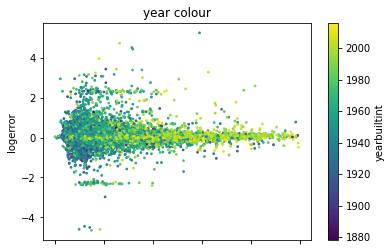

In [3]:
sig_cols = ['yearbuiltint','fips', 'regionidcity', 'pooltypeid', 'latitude',
            'longitude', 'rawcensustractandblock', 'regionidcounty', 'regionidzip']
smallhousedf = Housing_data.drop(['taxdelinquencyyear'], axis = 1)
smallhousedf = smallhousedf.dropna()
smallhousedf=smallhousedf[smallhousedf['finishedsquarefeet12'] <= 10000]
smallhousedf['yearbuiltint'] = smallhousedf['yearbuilt'].astype(int)
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='yearbuiltint', s=3,colormap='viridis')
plt.title('year colour')

Text(0.5,1,'fips colour')

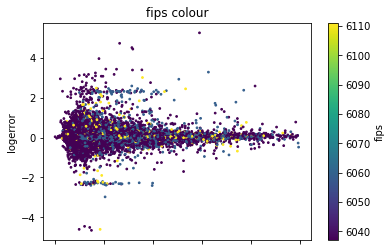

In [4]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='fips', s=3,colormap='viridis')
plt.title('fips colour')

In [5]:
smallhousedf['regionidcity'].describe()

count    140970.000000
mean      32997.226332
std       48027.712622
min          -1.000000
25%       12447.000000
50%       24435.000000
75%       44833.000000
max      396556.000000
Name: regionidcity, dtype: float64

Text(0.5,1,'regionidcity')

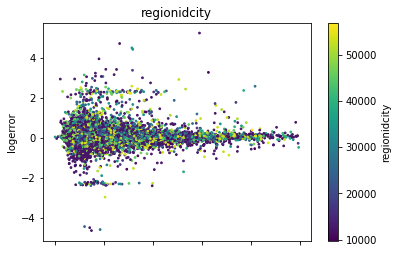

In [6]:
regionadj= smallhousedf[(smallhousedf['regionidcity'] > 9000) & (smallhousedf['regionidcity'] < 100000)]
regionadj.plot.scatter('finishedsquarefeet12', 'logerror', c='regionidcity', s=3, colormap='viridis')
plt.title('regionidcity')

Text(0.5,1,'pooltypeid')

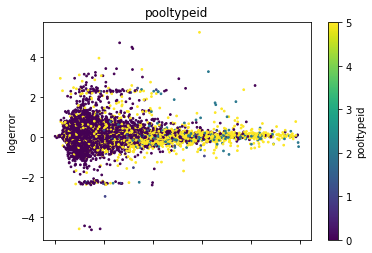

In [7]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='pooltypeid', s=3, colormap='viridis')
plt.title('pooltypeid')

In [8]:
smallhousedf['latitude'].describe()

count    1.409700e+05
mean     3.403278e+07
std      2.605809e+05
min      3.333930e+07
25%      3.384210e+07
50%      3.404630e+07
75%      3.418440e+07
max      3.481877e+07
Name: latitude, dtype: float64

Text(0.5,1,'latitude')

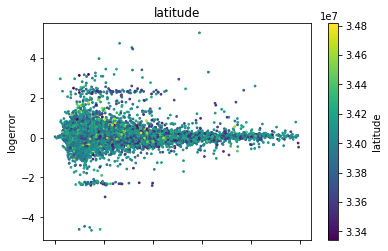

In [9]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='latitude', s=3,colormap='viridis')
plt.title('latitude')

In [10]:
smallhousedf['longitude'].describe()

count    1.409700e+05
mean    -1.182225e+08
std      3.487264e+05
min     -1.194754e+08
25%     -1.184305e+08
50%     -1.181957e+08
75%     -1.179646e+08
max     -1.175546e+08
Name: longitude, dtype: float64

Text(0.5,1,'longitude')

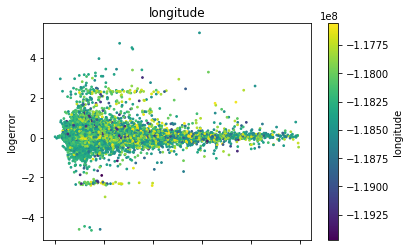

In [11]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='longitude', s=3, colormap='viridis')
plt.title('longitude')

In [12]:
smallhousedf['rawcensustractandblock'].describe()

count    1.409700e+05
mean     6.047822e+07
std      2.023419e+05
min      6.037101e+07
25%      6.037301e+07
50%      6.037574e+07
75%      6.059032e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64

Text(0.5,1,'rawcensustractandblock')

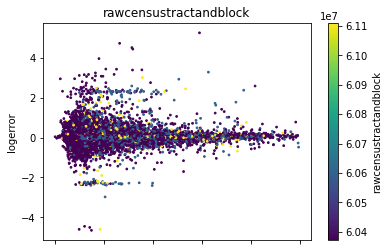

In [13]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='rawcensustractandblock', s=3,colormap='viridis')
plt.title('rawcensustractandblock')

Text(0.5,1,'regionidcounty')

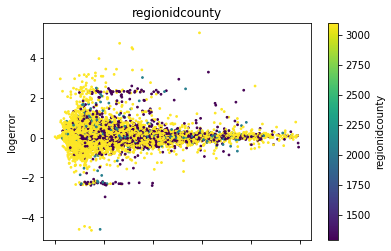

In [14]:
smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='regionidcounty', s=3,colormap='viridis')
plt.title('regionidcounty')

Text(0.5,1,'regionidzip')

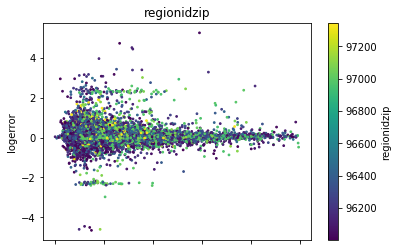

In [15]:
zipadj= smallhousedf[(smallhousedf['regionidzip'] > 96000) & (smallhousedf['regionidzip'] < 100000)]
zipadj.plot.scatter('finishedsquarefeet12', 'logerror', c='regionidzip', s=3,colormap='viridis')
plt.title('regionidzip')

In [16]:
insig_cols = ['buildingqualitytypeid','bathroomcnt','bedroomcnt','fullbathcnt','garagecarcnt','roomcnt','unitcnt',
              'fireplacecnt','propertycountylandusecode','propertylandusetypeid','regionidneighborhood','decktypeid',
              'lotsizesquarefeet','taxvaluedollarcnt','taxamount','poolsizesum','propertyzoningdesc',
              'airconditioningtypeid','heatingorsystemtypeid','calculatedbathnbr','landtaxvaluedollarcnt',
              'structuretaxvaluedollarcnt']

for col in insig_cols:
    print(smallhousedf[col].describe())
    print('')
    
smallhousedf['bedroomcnt'].describe()

count    140970.000000
mean          3.906363
std           3.587790
min          -1.000000
25%          -1.000000
50%           4.000000
75%           7.000000
max          12.000000
Name: buildingqualitytypeid, dtype: float64

count    140970.000000
mean          2.238356
std           0.938980
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: bathroomcnt, dtype: float64

count    140970.000000
mean          3.093453
std           0.999822
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          16.000000
Name: bedroomcnt, dtype: float64

count    140970.000000
mean          2.237228
std           0.936319
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: fullbathcnt, dtype: float64

count    140970.000000
mean         -0.151529
std           1.358961
min          -1.000000
25%          -1.000000


count    140970.000000
mean          3.093453
std           0.999822
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          16.000000
Name: bedroomcnt, dtype: float64

In [17]:
insig_cutoffs = [8,2,3,2,1,1,0,1,7,270,0,0,15000, 473861, 6019, 10, 10, 0, 3, 2, 600000, 600000]
test_feat = ['lotsizesquarefeet', 'taxvaluedollarcnt', 'taxamount', 'landtaxvaluedollarcnt',
             'structuretaxvaluedollarcnt']

Text(0.5,1,'lotsizesquarefeet')

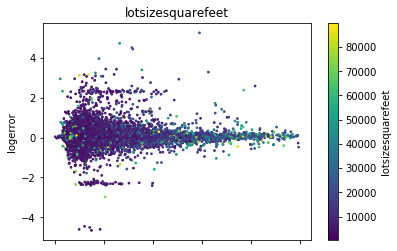

In [18]:
lot= smallhousedf[(smallhousedf['lotsizesquarefeet'] > 200) & (smallhousedf['lotsizesquarefeet'] < 90000)]
lot.plot.scatter('finishedsquarefeet12', 'logerror', c='lotsizesquarefeet', s=3,colormap='viridis')
plt.title('lotsizesquarefeet')

Text(0.5,1,'taxvaluedollarcnt')

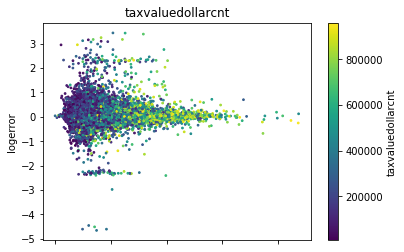

In [19]:
value= smallhousedf[(smallhousedf['taxvaluedollarcnt'] > 5000) & (smallhousedf['taxvaluedollarcnt'] < 960000)]
value.plot.scatter('finishedsquarefeet12', 'logerror', c='taxvaluedollarcnt', s=3,colormap='viridis')
plt.title('taxvaluedollarcnt')

Text(0.5,1,'taxamount')

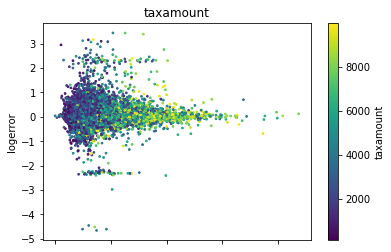

In [20]:
tax= smallhousedf[(smallhousedf['taxamount'] > 100) & (smallhousedf['taxamount'] < 10000)]
tax.plot.scatter('finishedsquarefeet12', 'logerror', c='taxamount', s=3,colormap='viridis')
plt.title('taxamount')

Text(0.5,1,'landtaxvaluedollarcnt')

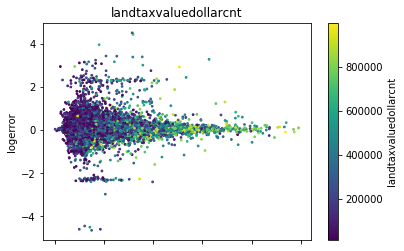

In [21]:
landtax= smallhousedf[(smallhousedf['landtaxvaluedollarcnt'] > 10000) & (smallhousedf['landtaxvaluedollarcnt'] < 1000000)]
landtax.plot.scatter('finishedsquarefeet12', 'logerror', c='landtaxvaluedollarcnt', s=3,colormap='viridis')
plt.title('landtaxvaluedollarcnt')

Text(0.5,1,'structuretaxvaluedollarcnt')

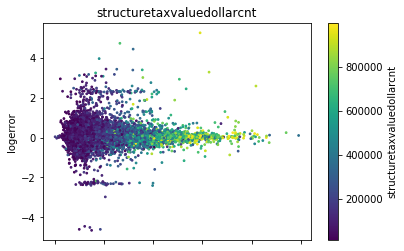

In [22]:
landtax= smallhousedf[(smallhousedf['structuretaxvaluedollarcnt'] > 10000) & (smallhousedf['structuretaxvaluedollarcnt'] < 1000000)]
landtax.plot.scatter('finishedsquarefeet12', 'logerror', c='structuretaxvaluedollarcnt', s=3,colormap='viridis')
plt.title('structuretaxvaluedollarcnt')

Text(0.5,0,'regionidcity')

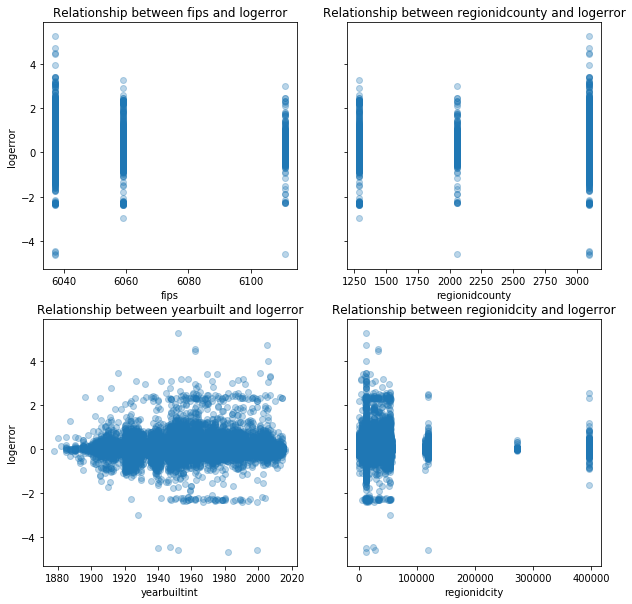

In [32]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize = (10,10))
ax1.set_ylabel("logerror")
ax1.scatter(smallhousedf['fips'], smallhousedf['logerror'], alpha = 0.3)
ax1.set_title("Relationship between fips and logerror")
ax1.set_xlabel("fips")
ax2.scatter(smallhousedf['regionidcounty'], smallhousedf['logerror'], alpha = 0.3)
ax2.set_title("Relationship between regionidcounty and logerror")
ax2.set_xlabel("regionidcounty")
ax3.set_ylabel("logerror")
ax3.scatter(smallhousedf['yearbuiltint'], smallhousedf['logerror'], alpha = 0.3)
ax3.set_title("Relationship between yearbuilt and logerror")
ax3.set_xlabel("yearbuiltint")
ax4.scatter(smallhousedf['regionidcity'], smallhousedf['logerror'], alpha = 0.3)
ax4.set_title("Relationship between regionidcity and logerror")
ax4.set_xlabel("regionidcity")

Text(0.5,0,'bedroomcnt')

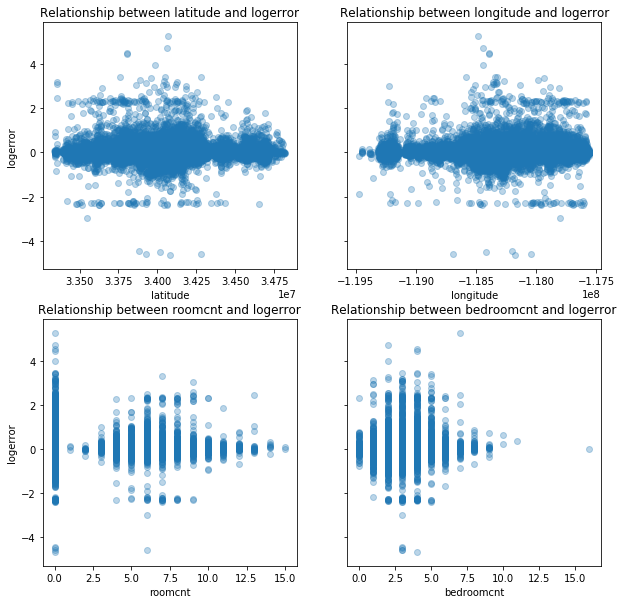

In [31]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize = (10,10))
ax1.set_ylabel("logerror")
ax1.scatter(smallhousedf['latitude'], smallhousedf['logerror'], alpha = 0.3)
ax1.set_title("Relationship between latitude and logerror")
ax1.set_xlabel("latitude")
ax2.scatter(smallhousedf['longitude'], smallhousedf['logerror'], alpha = 0.3)
ax2.set_title("Relationship between longitude and logerror")
ax2.set_xlabel("longitude")
ax3.set_ylabel("logerror")
ax3.scatter(smallhousedf['roomcnt'], smallhousedf['logerror'], alpha = 0.3)
ax3.set_title("Relationship between roomcnt and logerror")
ax3.set_xlabel("roomcnt")
ax4.scatter(smallhousedf['bedroomcnt'], smallhousedf['logerror'], alpha = 0.3)
ax4.set_title("Relationship between bedroomcnt and logerror")
ax4.set_xlabel("bedroomcnt")

Text(0.5,0,'regionidzip')

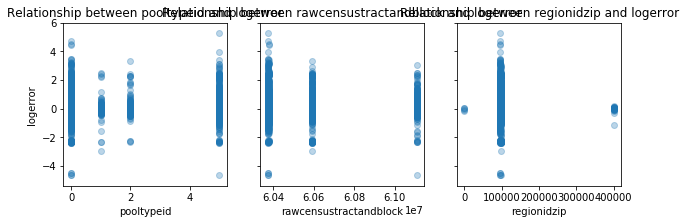

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (10,3))
ax1.set_ylabel("logerror")
ax1.scatter(smallhousedf['pooltypeid'], smallhousedf['logerror'], alpha = 0.3)
ax1.set_title("Relationship between pooltypeid and logerror")
ax1.set_xlabel("pooltypeid")
ax2.scatter(smallhousedf['rawcensustractandblock'], smallhousedf['logerror'], alpha = 0.3)
ax2.set_title("Relationship between rawcensustractandblock and logerror")
ax2.set_xlabel("rawcensustractandblock")
ax3.scatter(smallhousedf['regionidzip'], smallhousedf['logerror'], alpha = 0.3)
ax3.set_title("Relationship between regionidzip and logerror")
ax3.set_xlabel("regionidzip")

Text(0.5,0,'lotsizesquarefeet')

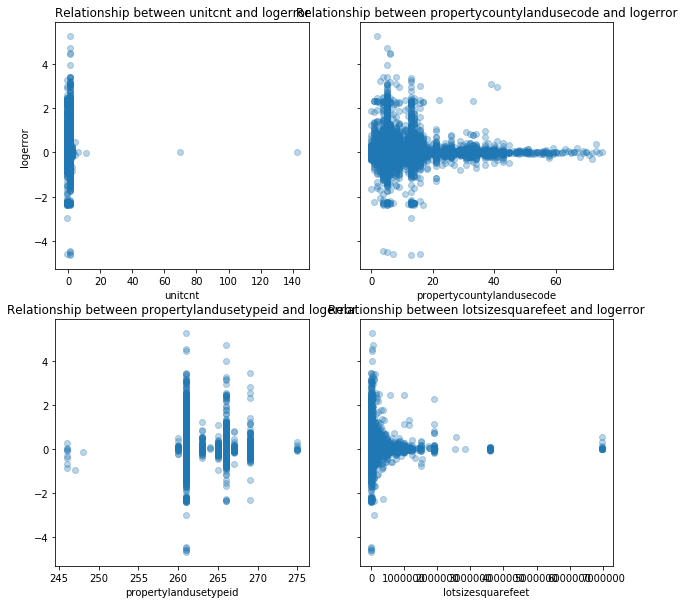

In [33]:
f, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize = (10,10))
ax1.set_ylabel("logerror")
ax1.scatter(smallhousedf['unitcnt'], smallhousedf['logerror'], alpha = 0.3)
ax1.set_title("Relationship between unitcnt and logerror")
ax1.set_xlabel("unitcnt")
ax2.scatter(smallhousedf['propertycountylandusecode'], smallhousedf['logerror'], alpha = 0.3)
ax2.set_title("Relationship between propertycountylandusecode and logerror")
ax2.set_xlabel("propertycountylandusecode")
ax3.scatter(smallhousedf['propertylandusetypeid'], smallhousedf['logerror'], alpha = 0.3)
ax3.set_title("Relationship between propertylandusetypeid and logerror")
ax3.set_xlabel("propertylandusetypeid")
ax4.scatter(smallhousedf['lotsizesquarefeet'], smallhousedf['logerror'], alpha = 0.3)
ax4.set_title("Relationship between lotsizesquarefeet and logerror")
ax4.set_xlabel("lotsizesquarefeet")

Text(0.5,0,'airconditioningtypeid')

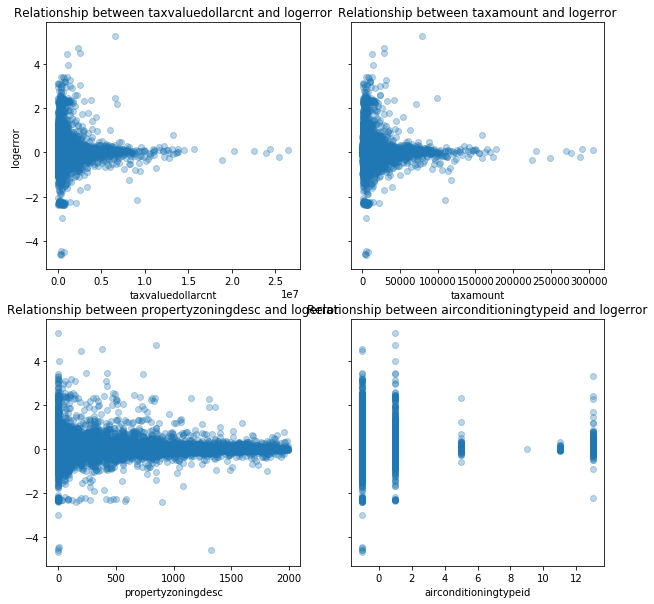

In [34]:
f, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize = (10,10))
ax1.set_ylabel("logerror")
ax1.scatter(smallhousedf['taxvaluedollarcnt'], smallhousedf['logerror'], alpha = 0.3)
ax1.set_title("Relationship between taxvaluedollarcnt and logerror")
ax1.set_xlabel("taxvaluedollarcnt")
ax2.scatter(smallhousedf['taxamount'], smallhousedf['logerror'], alpha = 0.3)
ax2.set_title("Relationship between taxamount and logerror")
ax2.set_xlabel("taxamount")
ax3.scatter(smallhousedf['propertyzoningdesc'], smallhousedf['logerror'], alpha = 0.3)
ax3.set_title("Relationship between propertyzoningdesc and logerror")
ax3.set_xlabel("propertyzoningdesc")
ax4.scatter(smallhousedf['airconditioningtypeid'], smallhousedf['logerror'], alpha = 0.3)
ax4.set_title("Relationship between airconditioningtypeid and logerror")
ax4.set_xlabel("airconditioningtypeid")

Text(0.5,0,'structuretaxvaluedollarcnt')

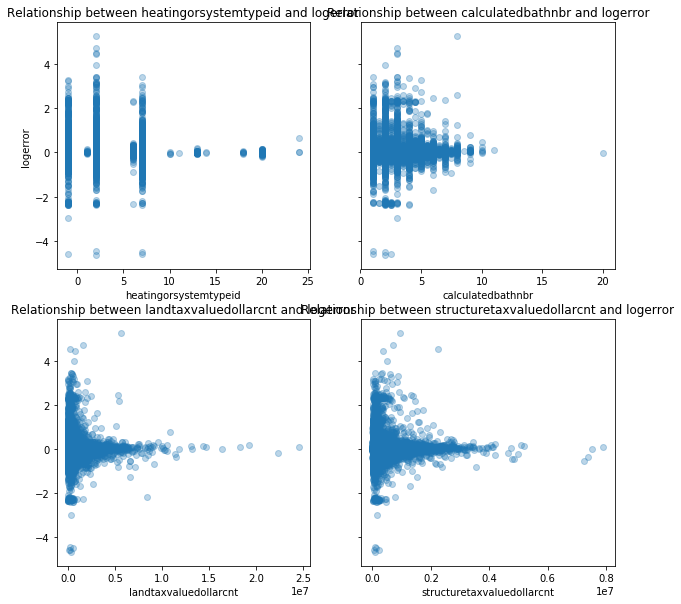

In [35]:
f, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize = (10,10))
ax1.set_ylabel("logerror")
ax1.scatter(smallhousedf['heatingorsystemtypeid'], smallhousedf['logerror'], alpha = 0.3)
ax1.set_title("Relationship between heatingorsystemtypeid and logerror")
ax1.set_xlabel("heatingorsystemtypeid")
ax2.scatter(smallhousedf['calculatedbathnbr'], smallhousedf['logerror'], alpha = 0.3)
ax2.set_title("Relationship between calculatedbathnbr and logerror")
ax2.set_xlabel("calculatedbathnbr")
ax3.scatter(smallhousedf['landtaxvaluedollarcnt'], smallhousedf['logerror'], alpha = 0.3)
ax3.set_title("Relationship between landtaxvaluedollarcnt and logerror")
ax3.set_xlabel("landtaxvaluedollarcnt")
ax4.scatter(smallhousedf['structuretaxvaluedollarcnt'], smallhousedf['logerror'], alpha = 0.3)
ax4.set_title("Relationship between structuretaxvaluedollarcnt and logerror")
ax4.set_xlabel("structuretaxvaluedollarcnt")